In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel('E:\PTDL\Pandas\house_price_dống-da.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

C:\Users\DELL\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Xử lý dữ liệu ngoại lai
df.drop(df[df['area']>=550].index, axis=0, inplace=True)

In [4]:
#Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá
df1 = df.dropna(subset=['price', 'area'], inplace=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              929 non-null    object        
 1   address            929 non-null    object        
 2   area               929 non-null    float64       
 3   price              929 non-null    float64       
 4   postDate           929 non-null    datetime64[ns]
 5   land_certificate   677 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             545 non-null    float64       
 9   bedroom            626 non-null    float64       
 10  floor              363 non-null    float64       
 11  type_of_land       929 non-null    object        
 12  street_name        779 non-null    object        
 13  ward_name          775 non-null    object        
 14  district_n

In [5]:
novalue = df1[df1['area'] == 0].index 
df1.drop(novalue, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14136\871973012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(novalue, inplace=True)


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              913 non-null    object        
 1   address            913 non-null    object        
 2   area               913 non-null    float64       
 3   price              913 non-null    float64       
 4   postDate           913 non-null    datetime64[ns]
 5   land_certificate   677 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             545 non-null    float64       
 9   bedroom            626 non-null    float64       
 10  floor              363 non-null    float64       
 11  type_of_land       913 non-null    object        
 12  street_name        779 non-null    object        
 13  ward_name          775 non-null    object        
 14  district_n

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              913 non-null    object        
 1   address            913 non-null    object        
 2   area               913 non-null    float64       
 3   price              913 non-null    float64       
 4   postDate           913 non-null    datetime64[ns]
 5   land_certificate   677 non-null    object        
 6   house_direction    43 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             545 non-null    float64       
 9   bedroom            626 non-null    float64       
 10  floor              363 non-null    float64       
 11  type_of_land       913 non-null    object        
 12  street_name        779 non-null    object        
 13  ward_name          775 non-null    object        
 14  district_n

In [8]:
# chi lấy dữ liệu nhà ngõ và nhà phố
df1 = df1[(df1['title'].str.contains('ngõ', case=False, na=False)) | (df1['title'].str.contains('phố', case=False, na=False))]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 1 to 997
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              468 non-null    object        
 1   address            468 non-null    object        
 2   area               468 non-null    float64       
 3   price              468 non-null    float64       
 4   postDate           468 non-null    datetime64[ns]
 5   land_certificate   306 non-null    object        
 6   house_direction    33 non-null     object        
 7   balcony_direction  20 non-null     object        
 8   toilet             227 non-null    float64       
 9   bedroom            278 non-null    float64       
 10  floor              217 non-null    float64       
 11  type_of_land       468 non-null    object        
 12  street_name        369 non-null    object        
 13  ward_name          365 non-null    object        
 14  district_n

In [9]:
df1['loai'] = np.where(df1['title'].str.contains('ngõ'), 'ngõ', 'phố')
df1.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,loai
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,phố
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,phố
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,ngõ
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,phố
5,"Bán gấp mặt phố Chùa Bộc, Đống Đa, thang máy, ...","Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",41.0,13500.0,2021-04-04,Sổ đỏ,NaN,NaN,5.0,3.0,6.0,Bán nhà mặt phố\n,Phố Chùa Bộc,Phường Quang Trung,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,phố


In [10]:
# xóa dữ liệu bất hợp lý (giá = 500000)
incorectvalue = df1[df1['price'] == 500000].index 
df1.drop(incorectvalue, inplace=True)

In [11]:
df1['trieu/m2'] = df1['price']/df1['area']

<AxesSubplot:xlabel='trieu/m2', ylabel='Density'>

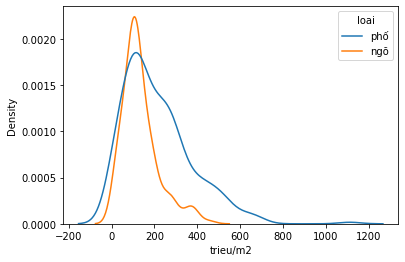

In [12]:
#sns.kdeplot (x = 'loai', y="trieu/m2", data=df1)
sns.kdeplot(data=df1, x="trieu/m2", hue="loai")

In [13]:
# Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%
df1.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,loai,trieu/m2
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105,phố,357.142857
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111,phố,73.684211
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011,ngõ,177.419355
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,phố,514.285714
5,"Bán gấp mặt phố Chùa Bộc, Đống Đa, thang máy, ...","Phố Chùa Bộc, Phường Quang Trung, Đống Đa, Hà Nội",41.0,13500.0,2021-04-04,Sổ đỏ,NaN,NaN,5.0,3.0,6.0,Bán nhà mặt phố\n,Phố Chùa Bộc,Phường Quang Trung,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230,phố,329.268293


In [18]:
df2 = df1.filter(['loai', 'trieu/m2'])
df2.describe()

,trieu/m2
count,467.000000
mean,185.262199
std,142.888626
min,0.122500
25%,93.939394
50%,134.000000
75%,258.245741
max,1111.111111


In [28]:
df_pho = df2[df2['loai'] == 'phố']

In [29]:
df_pho

,loai,trieu/m2
1,phố,357.142857
2,phố,73.684211
4,phố,514.285714
5,phố,329.268293
6,phố,260.000000
...,...,...
988,phố,401.315789
989,phố,102.631579
993,phố,139.880952
995,phố,269.230769


In [30]:
df_ngo = df2[df2['loai'] == 'ngõ']
df_ngo

,loai,trieu/m2
3,ngõ,177.419355
7,ngõ,111.538462
12,ngõ,103.000000
16,ngõ,24.000000
17,ngõ,28.571429
...,...,...
975,ngõ,128.571429
976,ngõ,258.064516
984,ngõ,355.555556
985,ngõ,272.413793


In [36]:
print(stats.ttest_ind(df_pho['trieu/m2'], df_ngo['trieu/m2'], equal_var=False))

Ttest_indResult(statistic=7.0446790505007995, pvalue=6.7665896602356334e-12)


In [40]:
df3 = df1.filter(['land_certificate', 'trieu/m2'])
df3.tail(30)

,land_certificate,trieu/m2
936,Sổ đỏ,21.153846
943,Sổ đỏ,81.818182
945,NaN,116.666667
946,NaN,124.528302
948,NaN,132.500000
952,NaN,551.111111
956,Sổ đỏ,666.666667
959,Sổ đỏ,58.333333
962,NaN,239.705882
965,Sổ đỏ,97.619048


In [51]:
df_sodo = df3[df3['land_certificate'] == 'Sổ đỏ']
df_Nan = df3[df3['land_certificate'].isna()]
df_Nan

,land_certificate,trieu/m2
94,NaN,93.939394
95,NaN,178.571429
100,NaN,109.090909
102,NaN,172.619048
106,NaN,480.000000
...,...,...
984,NaN,355.555556
988,NaN,401.315789
993,NaN,139.880952
994,NaN,114.000000


In [53]:
print(stats.ttest_ind(df_sodo['trieu/m2'], df_Nan['trieu/m2'], equal_var=False))

Ttest_indResult(statistic=1.464230340399202, pvalue=0.14415439964407603)
